In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Plotting library
from scipy.optimize import minimize # Optimization module in scipy
import seaborn as sns
%matplotlib inline
from scipy.io import loadmat # will be used to load MATLAB mat datafile format

In [266]:
# Import matlab files
mat = loadmat('ex4data1.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [267]:
weights = loadmat('ex3weights.mat')
weights.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [268]:
# Extract features X and label y from data 'ex3weights.mat' dataset
X, y = mat['X'], mat['y'].ravel()

# Add constant for intercept
X = np.concatenate((np.ones((len(X),1)), X), axis=1)

In [269]:
X.shape

(5000, 401)

In [270]:
# Extract weights of theta1 and theta2 from 'ex3weights.mat' dataset
theta1, theta2 = weights['Theta1'], weights['Theta2']

# Unroll theta1 and theta2 in a vector for the purpose of calculating gradient of cost function
w_nn = np.concatenate([theta1.ravel(), theta2.ravel()]) # weights of neural network

## Neural network -- Feedforward and costfunction

In [271]:
# Defining the variables needed for neural network
input_layer_size  = 400
hidden_layer_size = 25 
num_labels = 10

In [272]:
def sigmoid(z):
    
    return(1/(1 + np.exp(-z)))

In [273]:
# Define sigmoid gradient
def sigmoidGradient(z):
    g = 1/(1 + np.exp(-z))
    return (g * (1 - g))

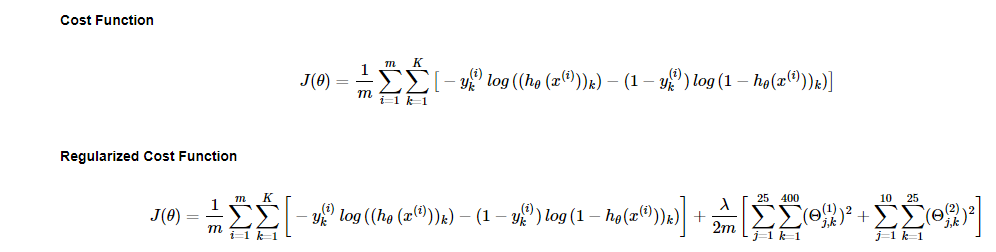

In [274]:
def nnCostFunction(w_nn, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_):
    
    # Using feedforward algorithm to get cost J
    
    a1 = X
    z2 = np.dot(a1, theta1.T) #5000*401 by 401*25
    a2 = sigmoid(z2) #5000*25
    a2 = np.concatenate((np.ones((len(a2), 1)), a2), axis=1) # add bias unit(5000*26)
    z3 = np.dot(a2, theta2.T) #5000*26 by 26*10
    a3 = sigmoid(z3) #5000*10
    h = a3
    #print(h.shape)# Neural network classifier of each class/output
    
    # Reshape parameters w_nn back to theta1 and theta2
    Theta1 = w_nn[0:(hidden_layer_size*(input_layer_size+1))].reshape(hidden_layer_size,(input_layer_size+1))
    Theta2 = w_nn[(hidden_layer_size*(input_layer_size+1)):].reshape(num_labels,(hidden_layer_size+1))
    
    # To compute cost function, vectorized approach is used, Hence y is converted to dummy variables
    y_output = pd.get_dummies(y).values
    m = len(y)

    J = ((-1/m) * (np.dot(y_output.ravel(), np.log(h).ravel()) + np.dot((1-y_output).ravel(), np.log(1-h).ravel()))) \
             + ((lambda_/ (2*m)) * (np.sum(Theta1[:, 1:] ** 2) + np.sum(Theta2[:, 1:] ** 2)))

    # Performing backpropagation algorithm to compute gradient required to minimize cost function
    # of the neural network
    d3 = a3 - y_output
    d2 = np.dot(d3, Theta2[:, 1:]) * sigmoidGradient(z2)

    delta1 = np.dot(a1.T, d2)
    delta2 = np.dot(a2.T, d3)

    # Performing gradient with regularization

    grad1 = (1/m) * delta1.T + (lambda_ * np.concatenate((np.zeros((len(Theta1), 1)), Theta1[:, 1:]), axis=1))               
    grad2 = (1/m) * delta2.T + (lambda_ * np.concatenate((np.zeros((len(Theta2), 1)), Theta2[:, 1:]), axis=1))


    return J, grad1, grad2


In [275]:
nnCostFunction(w_nn, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_=0)[0]

0.2876291651613189

In [277]:
nnCostFunction(w_nn, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_=1)[0]

0.38376985909092365

In [276]:
nnCostFunction(w_nn, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_=2)[0]

0.47991055302052843

In [278]:
nnCostFunction(w_nn, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_=3)[0]

0.5760512469501331

In [279]:
# Preform random initializtion to break symmetry
def randInitializeWeights(L_in, L_out, epsilon_init=0.12):
    W = np.random.rand(L_in, L_out) * (2 * epsilon_init) - epsilon_init
    return W

In [281]:
initial_theta1 = randInitializeWeights(hidden_layer_size, input_layer_size + 1)
initial_theta2 = randInitializeWeights(num_labels, hidden_layer_size + 1)

# Unroll initial theta parameters

initial_w_nn = np.concatenate([initial_theta1.ravel(), initial_theta2.ravel()])

In [285]:
# Create "short hand" for the cost function to be minimized
costFunction = lambda p: nnCostFunction(p, input_layer_size,
                                        hidden_layer_size,
                                        num_labels, X, y, lambda_)

lambda_ = 1

# Now, costFunction is a function that takes in only one argument
# (the neural network parameters)
res = minimize(costFunction,
                        initial_w_nn,
                        jac=True,
                        method='TNC',
                        options={'maxiter': 100})

w_nn = res.x

Theta1 = w_nn[0:(hidden_layer_size*(input_layer_size+1))].reshape(hidden_layer_size,(input_layer_size+1))
Theta2 = w_nn[(hidden_layer_size*(input_layer_size+1)):].reshape(num_labels,(hidden_layer_size+1))

ValueError: tnc: invalid gradient vector from minimized function.